In [17]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [18]:
from ema_workbench import (Model, MultiprocessingEvaluator, 
                           Policy, Scenario, ema_logging,
                           save_results, load_results, 
                           SequentialEvaluator)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties

import time
from problem_formulation import get_model_for_problem_formulation

# sns pair_plots create a lot of warnings
import warnings
warnings.filterwarnings('ignore')


ema_logging.log_to_stderr(ema_logging.INFO)

# for Open exploration we choose problem formulation
dike_model, planning_steps = get_model_for_problem_formulation(6)

In [19]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), 
# lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [20]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [21]:
# running the model through EMA workbench
try:
    results = load_results('results/open_exploration.tar.gz')
except IOError:
    with MultiprocessingEvaluator(dike_model) as evaluator:
        results = evaluator.perform_experiments(scenarios=50, policies=10)
        save_results(results, 'results/open_exploration.tar.gz')
# observing the simulation runs
experiments, outcomes = results

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 50 scenarios * 10 policies * 1 model(s) = 500 experiments


























































































































































































































































































































































































































100%|████████████████████████████████████████| 500/500 [04:20<00:00,  1.92it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] results saved successfully to /Users/reneevanderpoel/Documents/GitHub/epa1361_open/Test/results/open_exploration.tar.gz
[MainProcess/INFO] terminating pool


In [22]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,77,147.425477,10.0,0.003317,292.004107,1.0,0.416451,127.559993,1.0,0.932179,...,8,7,4,8,3,8,1,730,720,dikesnet
1,116,31.759809,1.5,0.981318,134.936283,1.5,0.636518,207.049412,1.5,0.665706,...,8,7,4,8,3,8,1,731,720,dikesnet
2,102,226.234292,10.0,0.527047,189.972002,1.5,0.696374,303.379327,10.0,0.650255,...,8,7,4,8,3,8,1,732,720,dikesnet
3,53,122.451943,1.0,0.442662,119.669151,1.0,0.327161,214.204126,1.0,0.180170,...,8,7,4,8,3,8,1,733,720,dikesnet
4,114,169.945914,10.0,0.147288,147.854202,10.0,0.855669,140.226842,10.0,0.896924,...,8,7,4,8,3,8,1,734,720,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,19,128.244474,1.0,0.621236,190.669133,1.5,0.115375,311.445886,10.0,0.067892,...,6,2,8,1,3,5,3,775,729,dikesnet
496,58,305.731311,1.5,0.216652,280.690445,1.0,0.964894,231.098021,1.0,0.391865,...,6,2,8,1,3,5,3,776,729,dikesnet
497,12,101.581990,1.5,0.768325,50.595762,1.5,0.137726,96.795197,1.5,0.548385,...,6,2,8,1,3,5,3,777,729,dikesnet
498,49,282.053484,10.0,0.722745,66.520154,1.0,0.205552,318.113968,1.0,0.456024,...,6,2,8,1,3,5,3,778,729,dikesnet


In [23]:
outcomes

{'A.1_Expected Annual Damage': array([9.43973936e+07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000

In [24]:
# create a dataframe from the outcomes with an extra column with policy names
policies = experiments['policy']
data = pd.DataFrame(outcomes)
data['policy'] = policies

In [25]:
data

,A.1_Expected Annual Damage,A.1_Total Costs,A.1_Expected Number of Deaths,A.2_Expected Annual Damage,A.2_Total Costs,A.2_Expected Number of Deaths,A.3_Expected Annual Damage,A.3_Total Costs,A.3_Expected Number of Deaths,A.4_Expected Annual Damage,A.4_Total Costs,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,policy
0,9.439739e+07,3.374241e+08,0.031893,0.000000e+00,2.339992e+08,0.000000,0.000000e+00,8.940260e+07,0.000000,0.0,5.081751e+07,0.0,0.000000e+00,1.583100e+08,0.000000,1.087700e+09,811.506118,720
1,0.000000e+00,2.430267e+08,0.000000,0.000000e+00,2.339992e+08,0.000000,0.000000e+00,8.940260e+07,0.000000,0.0,5.081751e+07,0.0,0.000000e+00,1.583100e+08,0.000000,1.087700e+09,0.000000,720
2,0.000000e+00,2.430267e+08,0.000000,0.000000e+00,2.339992e+08,0.000000,0.000000e+00,8.940260e+07,0.000000,0.0,5.081751e+07,0.0,0.000000e+00,1.583100e+08,0.000000,1.087700e+09,0.000000,720
3,0.000000e+00,2.430267e+08,0.000000,0.000000e+00,2.339992e+08,0.000000,1.824539e+07,1.076480e+08,0.011382,0.0,5.081751e+07,0.0,0.000000e+00,1.583100e+08,0.000000,1.087700e+09,385.112999,720
4,0.000000e+00,2.430267e+08,0.000000,0.000000e+00,2.339992e+08,0.000000,0.000000e+00,8.940260e+07,0.000000,0.0,5.081751e+07,0.0,0.000000e+00,1.583100e+08,0.000000,1.087700e+09,0.000000,720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.000000e+00,1.627907e+08,0.000000,4.865205e+06,2.386151e+08,0.000554,7.680208e+08,8.380098e+08,0.158739,0.0,4.263302e+07,0.0,0.000000e+00,9.837850e+07,0.000000,8.975000e+08,39462.096437,729
496,0.000000e+00,1.627907e+08,0.000000,0.000000e+00,2.337499e+08,0.000000,3.294559e+07,1.029346e+08,0.006974,0.0,4.263302e+07,0.0,1.663878e+07,1.150173e+08,0.001748,8.975000e+08,2442.125905,729
497,0.000000e+00,1.627907e+08,0.000000,2.500718e+06,2.362507e+08,0.000439,1.356840e+07,8.355736e+07,0.004193,0.0,4.263302e+07,0.0,0.000000e+00,9.837850e+07,0.000000,8.975000e+08,1041.409722,729
498,0.000000e+00,1.627907e+08,0.000000,0.000000e+00,2.337499e+08,0.000000,2.518041e+07,9.516938e+07,0.004157,0.0,4.263302e+07,0.0,0.000000e+00,9.837850e+07,0.000000,8.975000e+08,840.561713,729


In [42]:
# add columns to the dataframe in which total outcomes are defined for total costs and number of deaths

data['total costs'] = data['A.1_Total Costs'] + \
                                      data['A.2_Total Costs'] + \
                                      data['A.3_Total Costs'] + \
                                      data['A.4_Total Costs'] + \
                                      data['A.5_Total Costs']

data['total Expected Number of Deaths'] = data['A.1_Expected Number of Deaths'] + \
                                          data['A.2_Expected Number of Deaths'] + \
                                          data['A.3_Expected Number of Deaths'] + \
                                          data['A.4_Expected Number of Deaths'] + \
                                          data['A.5_Expected Number of Deaths']

data['total Expected Annual Damage'] = data['A.1_Expected Annual Damage'] + \
                                          data['A.2_Expected Annual Damage'] + \
                                          data['A.3_Expected Annual Damage'] + \
                                          data['A.4_Expected Annual Damage'] + \
                                          data['A.5_Expected Annual Damage']

In [43]:
#create an outcomes dataframe with only the relevant outcomes for A3
A_1data = data[['A.1_Total Costs', 'A.1_Expected Annual Damage', 
                'A.1_Expected Number of Deaths', 'RfR Total Costs',
                'Expected Evacuation Costs', "policy"]]

A_2data = data[['A.2_Total Costs', 'A.2_Expected Annual Damage', 
                'A.2_Expected Number of Deaths', 'RfR Total Costs',
                'Expected Evacuation Costs', "policy"]]

A_3data = data[['A.3_Total Costs','A.2_Expected Annual Damage', 
                'A.3_Expected Number of Deaths', 'RfR Total Costs',
                'Expected Evacuation Costs', "policy"]]

A_4data = data[['A.4_Total Costs', 'A.3_Expected Annual Damage', 
                'A.4_Expected Number of Deaths', 'RfR Total Costs',
                'Expected Evacuation Costs', "policy"]]

A_5data = data[['A.5_Total Costs', 'A.4_Expected Annual Damage', 
                'A.5_Expected Number of Deaths', 'RfR Total Costs',
                'Expected Evacuation Costs', "policy"]]

A_totaldata=data[['total costs', 'total Expected Annual Damage', 
                  'total Expected Number of Deaths', 'RfR Total Costs',
                  'Expected Evacuation Costs', "policy"]]

KeyError: "['A.2_Expected Annual DamageA.2_Expected Number of Deaths'] not in index"

In [44]:
data.columns

Index(['A.1_Expected Annual Damage', 'A.1_Total Costs',
       'A.1_Expected Number of Deaths', 'A.2_Expected Annual Damage',
       'A.2_Total Costs', 'A.2_Expected Number of Deaths',
       'A.3_Expected Annual Damage', 'A.3_Total Costs',
       'A.3_Expected Number of Deaths', 'A.4_Expected Annual Damage',
       'A.4_Total Costs', 'A.4_Expected Number of Deaths',
       'A.5_Expected Annual Damage', 'A.5_Total Costs',
       'A.5_Expected Number of Deaths', 'RfR Total Costs',
       'Expected Evacuation Costs', 'policy', 'total costs',
       'total Expected Number of Deaths', 'total Expected Annual Damage'],
      dtype='object')

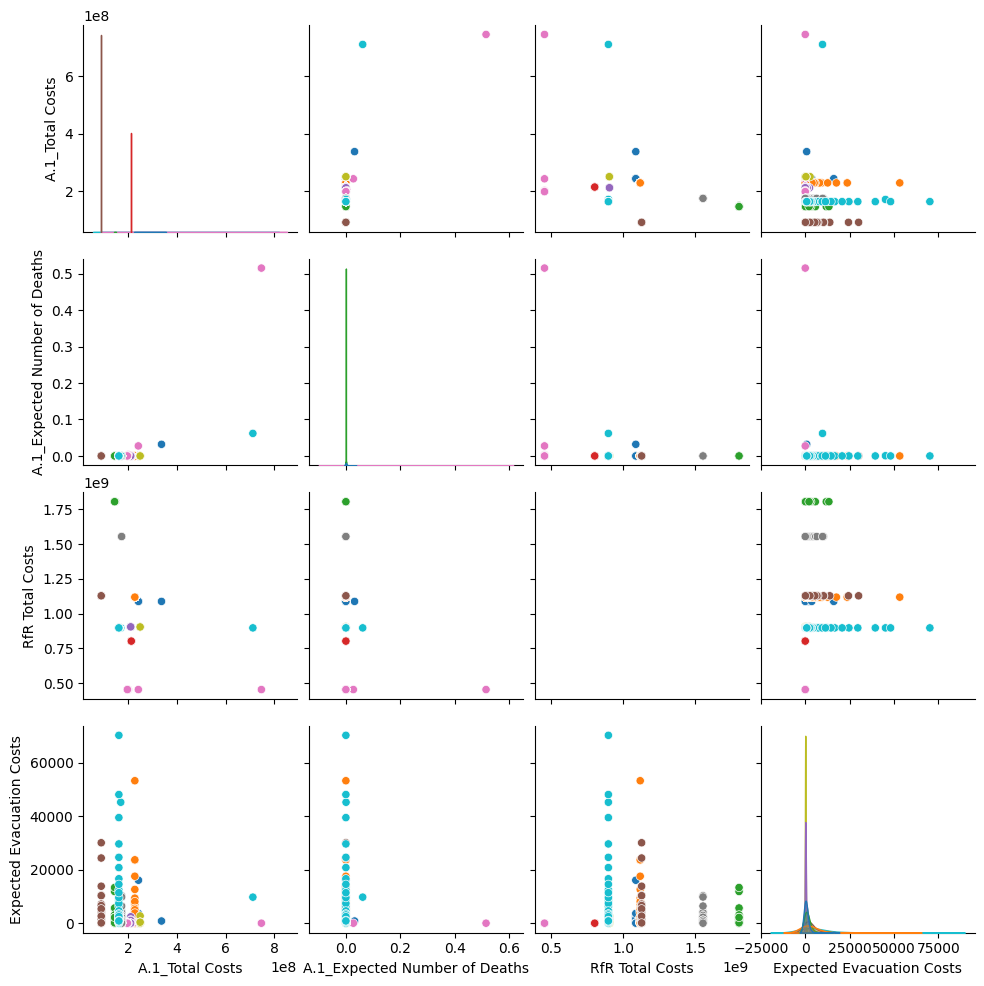

In [29]:
# a pairplot is created to be able to have a first glance at the objectives and possible trade-offs
A1pairplot=sns.pairplot(A_1data, 
                        hue='policy', 
                        vars=['A.1_Total Costs', 
                              'A.1_Expected Number of Deaths', 
                              'RfR Total Costs', 
                              'Expected Evacuation Costs'])

A1pairplot._legend.remove()
A1pairplot.savefig("Figures/A1pairplot.png")

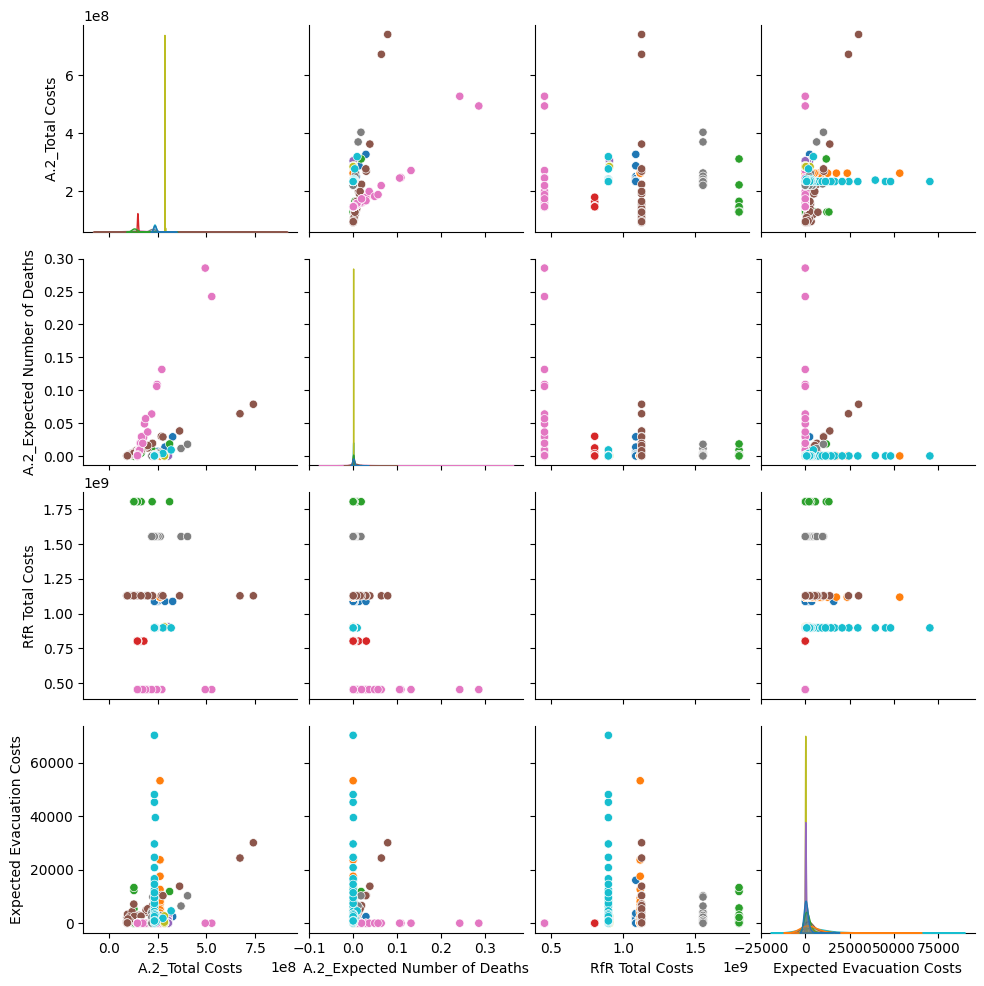

In [30]:
# a pairplot is created to be able to have a first glance at the objectives and possible trade-offs
A2pairplot=sns.pairplot(A_2data, 
                        hue='policy', 
                        vars=['A.2_Total Costs', 
                              'A.2_Expected Number of Deaths', 
                              'RfR Total Costs', 
                              'Expected Evacuation Costs'])

A2pairplot._legend.remove()
A2pairplot.savefig("Figures/A2pairplot.png")

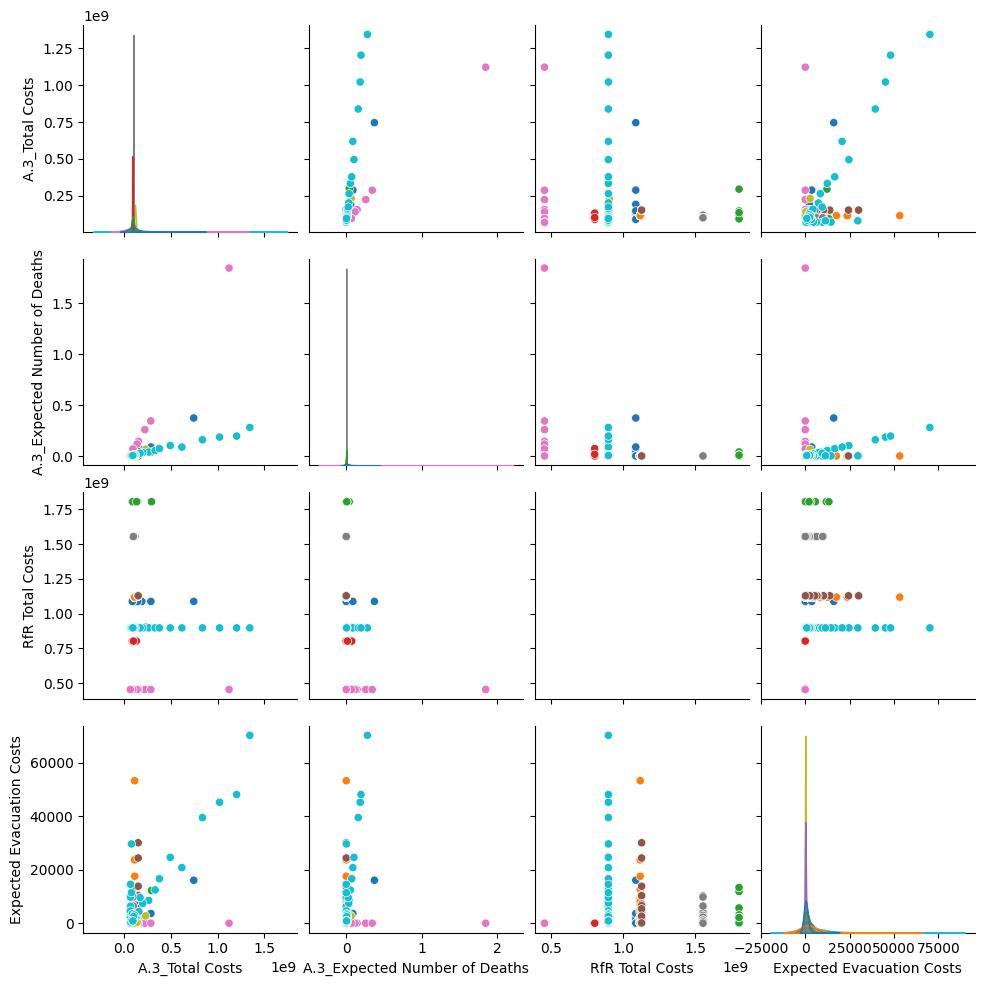

In [31]:
# a pairplot is created to be able to have a first glance at the objectives and possible trade-offs
A3pairplot=sns.pairplot(A_3data, 
                        hue='policy', 
                        vars=['A.3_Total Costs', 
                              'A.3_Expected Number of Deaths', 
                              'RfR Total Costs', 
                              'Expected Evacuation Costs'])

A3pairplot._legend.remove()
A3pairplot.savefig("Figures/A3pairplot.png")

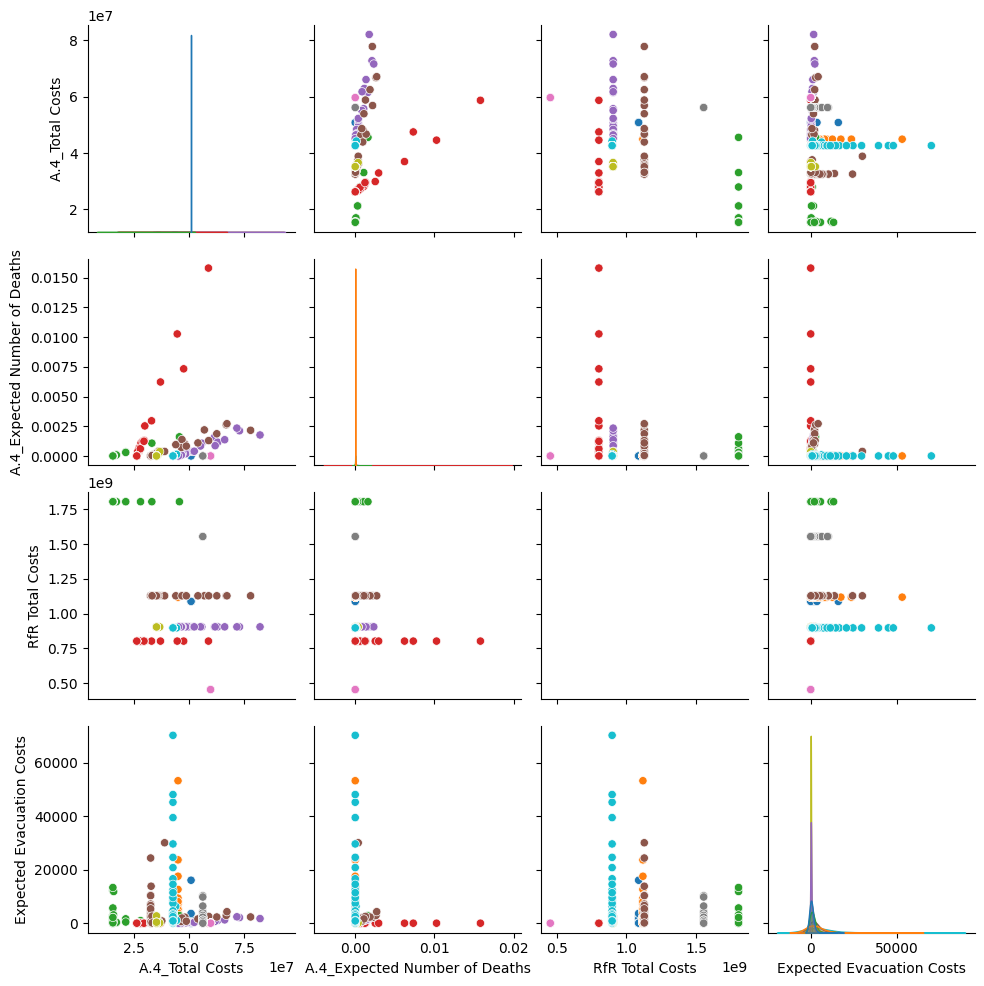

In [33]:
# a pairplot is created to be able to have a first glance at the objectives and possible trade-offs
A4pairplot=sns.pairplot(A_4data, 
                        hue='policy', 
                        vars=['A.4_Total Costs', 
                              'A.4_Expected Number of Deaths', 
                              'RfR Total Costs', 
                              'Expected Evacuation Costs'])

A4pairplot._legend.remove()
A4pairplot.savefig("Figures/A4pairplot.png")

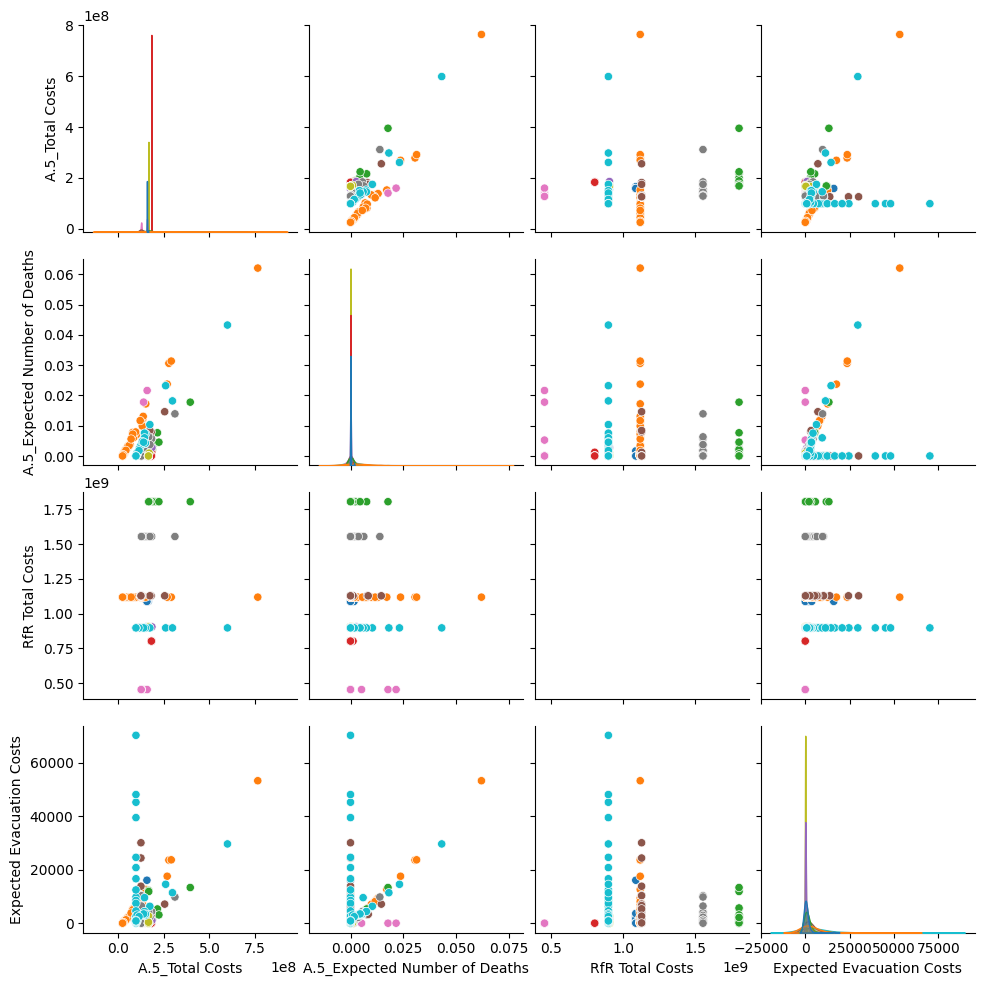

In [34]:
# a pairplot is created to be able to have a first glance at the objectives 
# and possible trade-offs
A5pairplot=sns.pairplot(A_5data, 
                        hue='policy', 
                        vars=['A.5_Total Costs', 
                              'A.5_Expected Number of Deaths', 
                              'RfR Total Costs', 
                              'Expected Evacuation Costs'])

A5pairplot._legend.remove()
A5pairplot.savefig("Figures/A5pairplot.png")

!!! Dit moet aangepast worden!!!!!! 
Various correlations between outcomes are present.



-------------------------------------------------------------------------------------------------------------

* PRIM Scenario Discovery

For the prim analyses boundaries have to be set on the outcomes of interest. To determine which boundary to pick, kde plots are made.

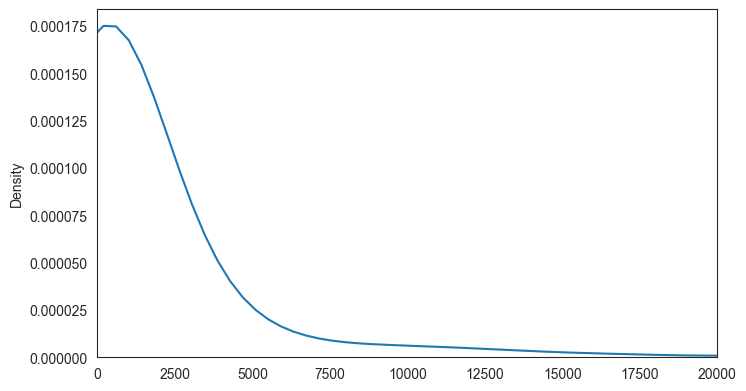

In [40]:
fig, ax = plt.subplots()
sns.kdeplot(outcomes['Expected Evacuation Costs'], ax=ax)
sns.set_style('white')
fig.set_size_inches(8,6)
plt.xlim([0, 20000])
fig.subplots_adjust(bottom=0.3)
plt.show()

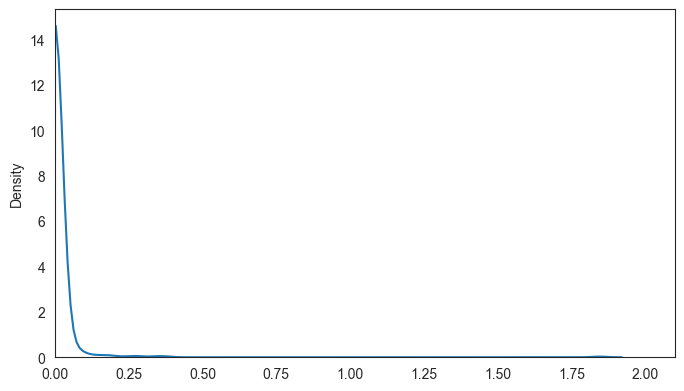

In [41]:
fig, ax = plt.subplots()
sns.kdeplot(outcomes['A.3_Expected Number of Deaths'], ax=ax)
sns.set_style('white')
fig.set_size_inches(8,6)
plt.xlim([0, 2.1])
fig.subplots_adjust(bottom=0.3)
plt.show()

boundaries are set on the variables and the fraction of cases which are subsequently evaluated, are determined. All three boundaries contain approximately 75% of the cases.

In [59]:
ydeaths = outcomes['A.3_Expected Number of Deaths'] < 0.0001
np.sum(ydeaths)/len(outcomes['A.3_Expected Number of Deaths'])

0.792

In [62]:
# Verander tot het ongeveer 75% is 
yevac=outcomes['Expected Evacuation Costs'] < 1500
np.sum(yevac)/len(outcomes['Expected Evacuation Costs'])

0.76

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 500 points remaining, containing 396 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.12, coverage: 0.15151515151515152, density: 1.0 restricted_dimensions: 6


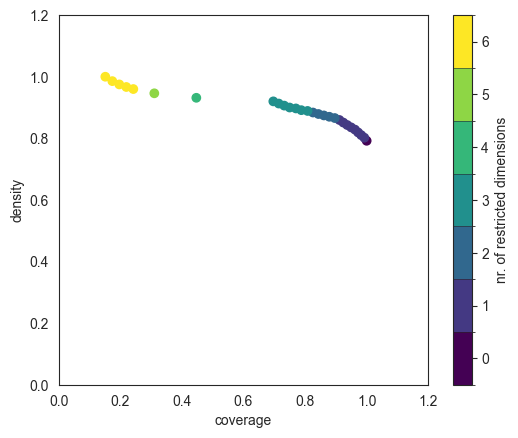

In [63]:
from ema_workbench.analysis import prim
x1 = experiments.drop([o.name for o in dike_model.levers] + ["policy"], axis=1)

prim_alg = prim.Prim(x1, ydeaths, threshold=0.5, peel_alpha=0.01)
boxbestdeaths = prim_alg.find_box()

boxbestdeaths.show_tradeoff()
plt.show()

In [65]:
boxbestdeaths.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.792000,0,1.00,0.792000,0
1,0.992424,0.802041,1,0.98,0.802041,1
2,0.982323,0.810417,2,0.96,0.810417,1
3,0.972222,0.819149,3,0.94,0.819149,1
4,0.962121,0.828261,4,0.92,0.828261,1
5,0.949495,0.835556,5,0.90,0.835556,1
6,0.936869,0.843182,6,0.88,0.843182,1
7,0.924242,0.851163,7,0.86,0.851163,1
8,0.911616,0.859524,8,0.84,0.859524,1
9,0.896465,0.865854,9,0.82,0.865854,2


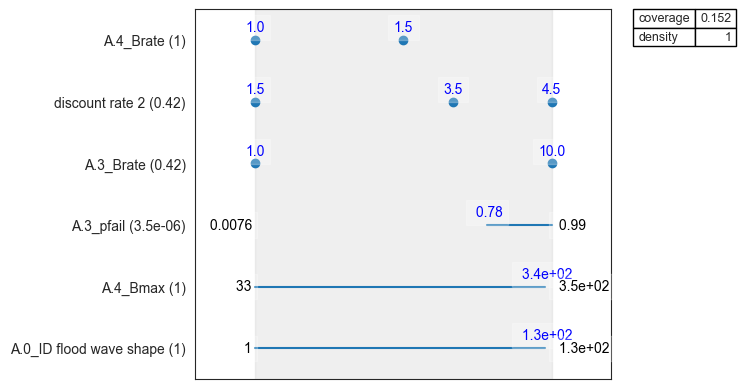

In [70]:
bestdeaths=boxbestdeaths.inspect(style='graph')